## 对twitter数据集进行数据清洗和分析

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns

## 加载数据

In [2]:
def load_tweets_data(name): 
    csv_path = os.path.join("./mediaeval2016/", name) 
    return pd.read_csv(csv_path)

trainTweets = load_tweets_data("train_posts_clean.csv")
testTweets = load_tweets_data("test_posts.csv")

## 基本情况

In [3]:
trainTweets.shape, testTweets.shape, trainTweets.info(), testTweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13382 entries, 0 to 13381
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_id    13382 non-null  int64 
 1   post_text  13382 non-null  object
 2   user_id    13382 non-null  int64 
 3   image_id   13382 non-null  object
 4   username   13382 non-null  object
 5   timestamp  13382 non-null  object
 6   label      13382 non-null  object
dtypes: int64(2), object(5)
memory usage: 732.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   post_id    1098 non-null   int64  
 1   post_text  1098 non-null   object 
 2   user_id    1098 non-null   float64
 3   username   1098 non-null   object 
 4   image_id   1098 non-null   object 
 5   timestamp  1098 non-null   object 
 6   label      1098 non-null   object 
dtypes: float64(1), int

((13382, 7), (1098, 7), None, None)

## 去除无关列

In [4]:
trainTweets.drop(["timestamp"],axis=1,inplace=True)
trainTweets.drop(["post_id"],axis=1,inplace=True)
trainTweets.drop(["user_id"],axis=1,inplace=True)
trainTweets.drop(["username"],axis=1,inplace=True)

trainTweets.info(), trainTweets.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13382 entries, 0 to 13381
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_text  13382 non-null  object
 1   image_id   13382 non-null  object
 2   label      13382 non-null  object
dtypes: object(3)
memory usage: 313.8+ KB


(None, (13382, 3))

## 文本预处理

In [5]:
# 转小写
trainTweets['post_text'] = trainTweets['post_text'].apply(lambda x: x.lower())
trainTweets.head()

# 删除标点
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

trainTweets['post_text'] = trainTweets['post_text'].apply(punctuation_removal)
trainTweets.head()

# 删除英文停用词
nltk.download('stopwords')
stop = stopwords.words('english')
trainTweets['post_text'] = trainTweets['post_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

trainTweets.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhongshannan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,post_text,image_id,label
0,dont need feds solve bostonbombing 4chan httpt...,boston_fake_03,fake
1,pic comparison boston suspect sunil tripathis ...,boston_fake_23,fake
2,im completely convinced sunil tripathi fellow—...,boston_fake_34,fake
3,brutal lo que se puede conseguir en colaboraci...,boston_fake_03,fake
4,4chan bombing throwing httptcodiyso7lxqm httpt...,boston_fake_15,fake


## 生成event列

In [7]:
# 生成topic列
event = [] 
for value in trainTweets["image_id"]: 
    event.append(str(value).split("_")[0])
                  
trainTweets["event"] = event    
trainTweets.head()

,post_text,image_id,label,event
0,dont need feds solve bostonbombing 4chan httpt...,boston_fake_03,fake,boston
1,pic comparison boston suspect sunil tripathis ...,boston_fake_23,fake,boston
2,im completely convinced sunil tripathi fellow—...,boston_fake_34,fake,boston
3,brutal lo que se puede conseguir en colaboraci...,boston_fake_03,fake,boston
4,4chan bombing throwing httptcodiyso7lxqm httpt...,boston_fake_15,fake,boston


## 统计计数

In [8]:
# 真假新闻统计
trainTweets['label'].value_counts()

fake    7556
real    5826
Name: label, dtype: int64

In [9]:
# 事件统计
trainTweets['event'].value_counts()

sandy                 9823
nepal                 1360
boston                 532
malaysia               310
eclipse                277
sochi                  274
samurai                218
columbianChemicals     185
bringback              131
underwater             113
garissa                 79
passport                44
pigFish                 14
elephant                13
livr                     9
Name: event, dtype: int64

## 可视分析

In [10]:
# 话题
event = trainTweets.event.unique()
print(event,len(event))

['boston' 'malaysia' 'passport' 'sandy' 'sochi' 'bringback'
 'columbianChemicals' 'elephant' 'livr' 'pigFish' 'underwater' 'eclipse'
 'samurai' 'nepal' 'garissa'] 15


label
fake    7556
real    5826
Name: post_text, dtype: int64


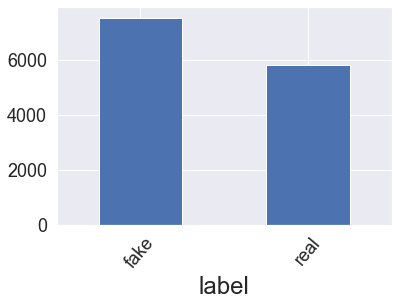

In [23]:
# 训练集真假比率
print(trainTweets.groupby(['label'])['post_text'].count())
trainTweets.groupby(['label'])['post_text'].count().plot(kind='bar', fontsize=18)
plt.xticks(rotation=50) 
plt.show()

In [13]:
# 词云
event_words = list(trainTweets.event.unique())
en_stop_words = nltk.corpus.stopwords.words('english')
sp_stop_words = nltk.corpus.stopwords.words('spanish')
twitter = ['rt', 'http', 'co','https','nhttp','nhttps']

# 完整停用词 由英文停用词、西班牙文停用词、事件词汇、rt构成
block_words = en_stop_words + sp_stop_words + event_words + twitter

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# 自定义图层颜色
from matplotlib.colors import LinearSegmentedColormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

def generate_word_cloud(input_tweets):
    tweets = input_tweets
    tweets_text = " ".join(tweets.post_text.to_numpy().tolist())
    
    # 词云
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='White', colormap=cmap, collocations=False, stopwords = block_words).generate(tweets_text)
    plt.figure(figsize=(16,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # 关闭轴
    plt.show()
    wordcloud.to_file("real.png")

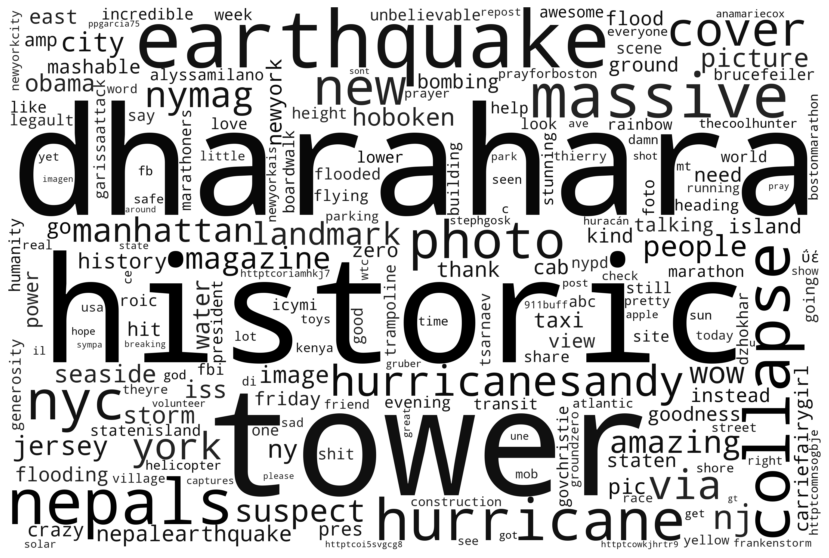

In [15]:
# 展示真实新闻的词云图
generate_word_cloud(trainTweets[trainTweets['label'] == 'real'])

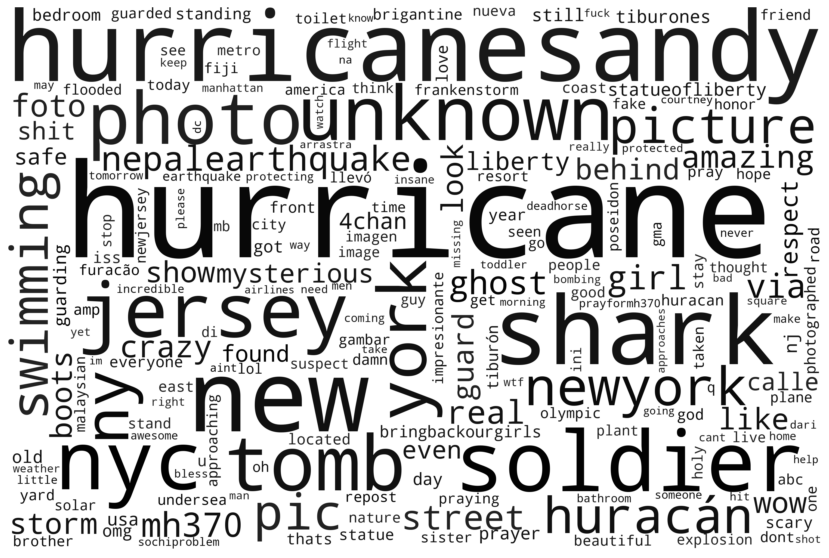

In [16]:
# 展示虚假新闻的词云图
generate_word_cloud(trainTweets[trainTweets['label'] == 'fake'])

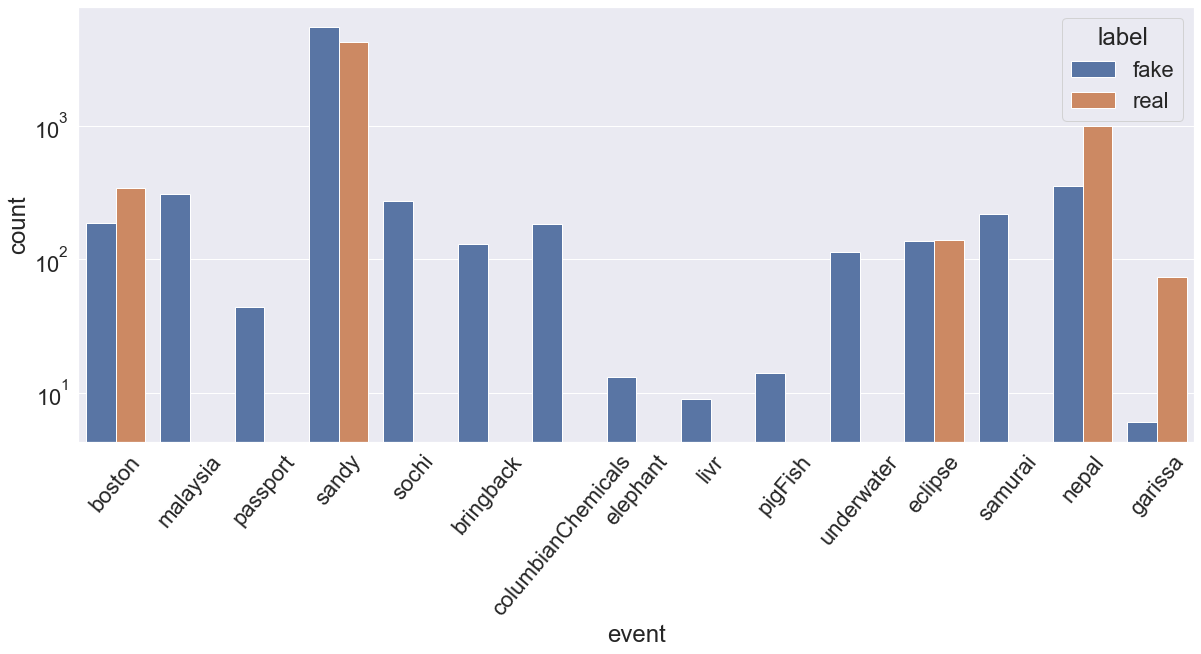

In [17]:
# 不同事件的真假新闻分布
sns.set_theme(style="ticks", color_codes=True)

plt.figure(figsize=(20, 8))
sns.set(font_scale=2)  # crazy big

ax = sns.countplot(x="event", hue="label", data=trainTweets)
ax.set_yscale("log")
plt.xticks(rotation=50) # 坐标轴倾斜角度70度
plt.show()

# 对测试集进行简单分析

In [18]:
testTweets.drop(["timestamp"],axis=1,inplace=True)
testTweets.drop(["post_id"],axis=1,inplace=True)
testTweets.drop(["user_id"],axis=1,inplace=True)
testTweets.drop(["username"],axis=1,inplace=True)

# 生成event列
event = [] 
for value in testTweets["image_id"]: 
    event.append(str(value).split("_")[0])
                  
testTweets["event"] = event    
testTweets.head()

,post_text,image_id,label,event
0,"Tristesse...😢🙏 \n#Bataclan sold out, musiciens...",attacks_paris_1,fake,attacks
1,RT @Proyecto40: #ÚltimaHora Espectacular fotog...,attacks_paris_1,fake,attacks
2,RT @Javivi1976: #Bataclan esta noche antes de ...,attacks_paris_1,fake,attacks
3,RT @Pizzigatas: El hombre tiene que establecer...,attacks_paris_1,fake,attacks
4,🇫🇷 #Paris https://t.co/zjjRPC7USm,attacks_paris_1,fake,attacks


In [19]:
testTweets['label'].value_counts()

fake    630
real    468
Name: label, dtype: int64

In [20]:
testTweets['event'].value_counts()

attacks       288
fuji          170
bowie          72
refugees       68
not            67
protest        64
pakistan       53
immigrants     51
half           39
rio            33
gandhi         29
bush           27
burst          25
john           20
hubble         18
syrian         12
nazi           11
woman          11
north          10
brussels        9
black           7
mc              6
five            6
soldier         1
ukrainian       1
Name: event, dtype: int64

In [21]:
event = testTweets.event.unique()
print(event,len(event))

['attacks' 'black' 'bowie' 'brussels' 'burst' 'bush' 'five' 'fuji'
 'gandhi' 'half' 'hubble' 'immigrants' 'john' 'mc' 'nazi' 'north' 'not'
 'pakistan' 'protest' 'refugees' 'rio' 'soldier' 'syrian' 'ukrainian'
 'woman'] 25


label
fake    630
real    468
Name: post_text, dtype: int64


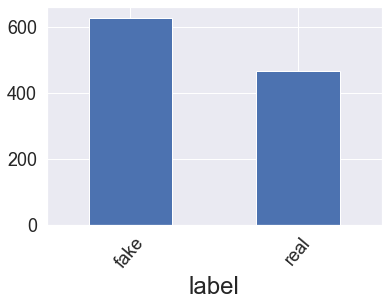

In [22]:
# 测试集真假比率
print(testTweets.groupby(['label'])['post_text'].count())
testTweets.groupby(['label'])['post_text'].count().plot(kind='bar', fontsize=18)
plt.xticks(rotation=50) 
plt.show()

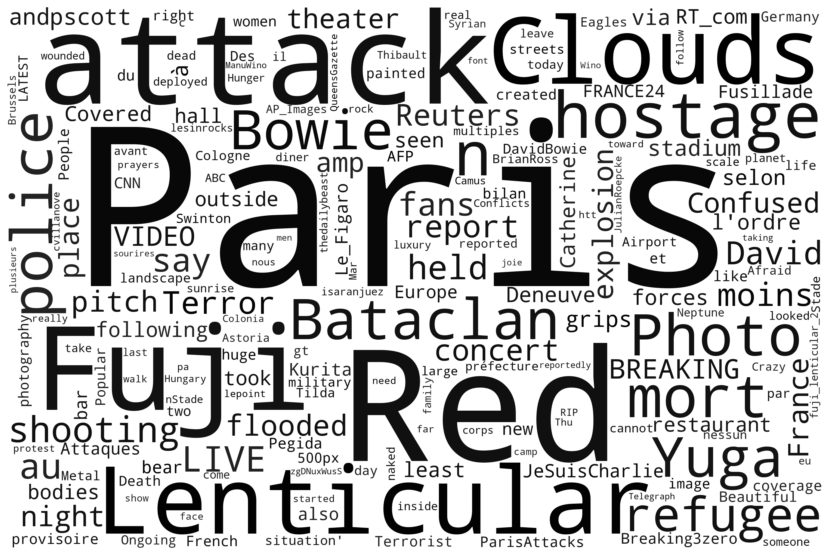

In [24]:
# 展示测试集 真实新闻的词云图
generate_word_cloud(testTweets[testTweets['label'] == 'real'])

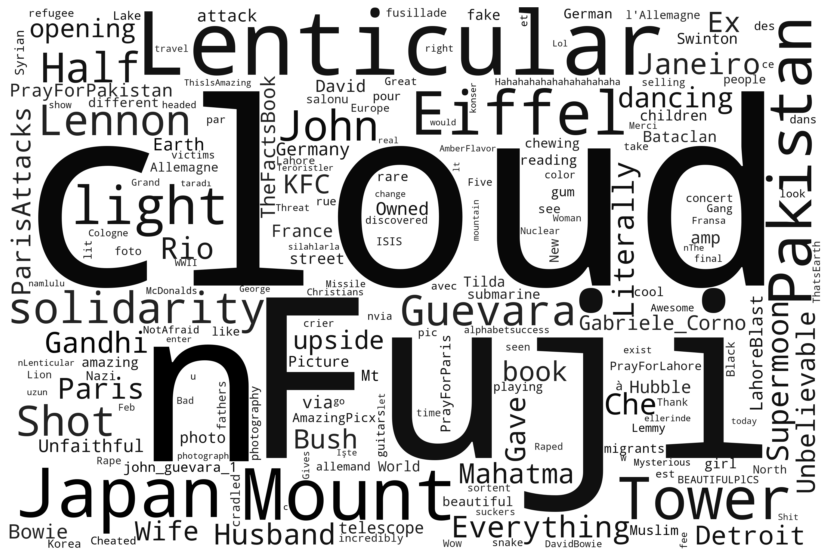

In [25]:
# 展示测试集 虚假新闻的词云图
generate_word_cloud(testTweets[testTweets['label'] == 'fake'])

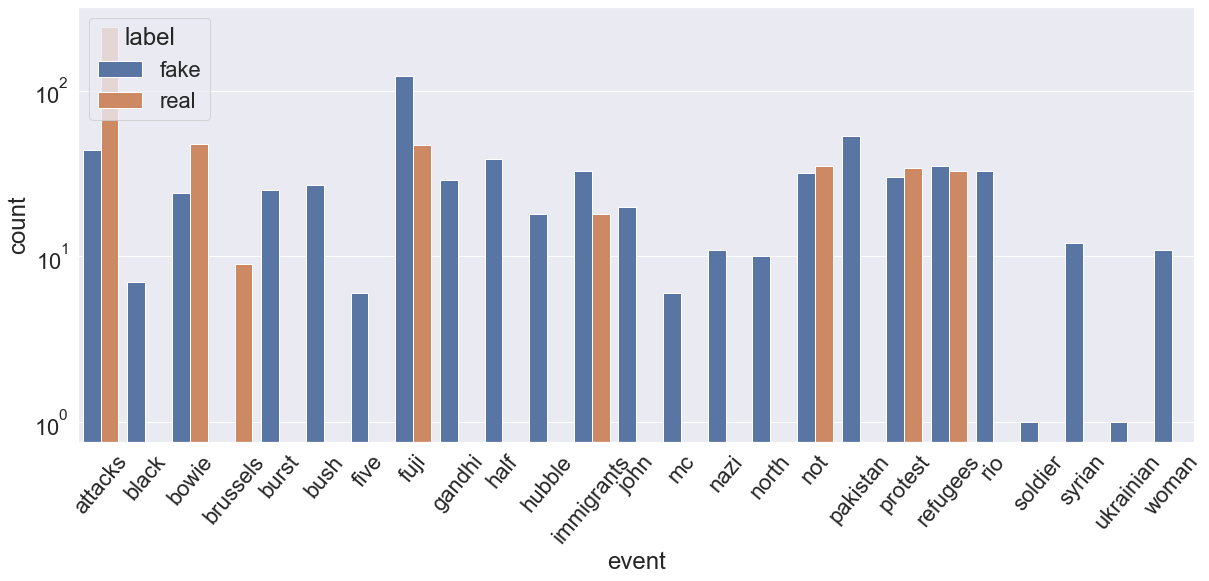

In [26]:
# 测试集 不同事件的真假新闻分布
sns.set_theme(style="ticks", color_codes=True)

plt.figure(figsize=(20, 8))
sns.set(font_scale=2)  # crazy big

ax = sns.countplot(x="event", hue="label", data=testTweets)
ax.set_yscale("log")
plt.xticks(rotation=50) # 坐标轴倾斜角度70度
plt.show()